In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pd.set_option('display.max_column',None)
file_path = 'C:\Dataworks\Iungo solutions\heart_disease.csv'
df = pd.read_csv(file_path)
df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
5,Female,43,primaryschool,0,0.0,0.0,no,1,0,228.0,180.0,110.0,30.30,77.0,99.0,No
6,Female,63,uneducated,0,0.0,0.0,no,0,0,205.0,138.0,71.0,33.11,60.0,85.0,yes
7,Female,45,primaryschool,1,20.0,0.0,no,0,0,313.0,100.0,71.0,21.68,79.0,78.0,No
8,Male,52,uneducated,0,0.0,0.0,no,1,0,260.0,141.5,89.0,26.36,76.0,79.0,No
9,Male,43,uneducated,1,30.0,0.0,no,1,0,225.0,162.0,107.0,23.61,93.0,88.0,No


##Data wrangling for the heart disease dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [14]:
df.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object

In [15]:
## Data Wrangling 
# find the missing value
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [16]:
## fill in the missing values and renaming some columns

df['education'] = df['education'] .fillna(df['education'].mode().iloc[0])
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

df.isnull().sum()


Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

Descriptive Statistics for the heart disease dataset

In [17]:
## description of each column in the dataset 
df.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,49.584946,0.494101,8.941482,0.029259,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587
std,8.572160,0.500024,11.902399,0.168552,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [18]:
## renaming columns
df['Heart_stroke'] = df['Heart_ stroke']
df.drop(columns=['Heart_ stroke'], inplace=True)
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,0.0,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,78.0,No


Frequency Analysis

In [19]:
df['Gender'].value_counts()

Female    2419
Male      1819
Name: Gender, dtype: int64

In [20]:
df['education'].value_counts()

uneducated       1825
primaryschool    1253
graduate          687
postgraduate      473
Name: education, dtype: int64

In [21]:
df['prevalentStroke'].value_counts()

no     4213
yes      25
Name: prevalentStroke, dtype: int64

In [22]:
df['Heart_stroke'].value_counts()

No     3594
yes     644
Name: Heart_stroke, dtype: int64

Correlation Analysis

In [23]:
df.corr()

C:\Users\marvellous\AppData\Local\Temp\ipykernel_5004\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.213748,-0.191847,0.120955,0.307194,0.101258,0.260105,0.394302,0.206104,0.135174,-0.012848,0.117788
currentSmoker,-0.213748,1.000000,0.760239,-0.048358,-0.103260,-0.044295,-0.046466,-0.130230,-0.107746,-0.167161,0.062330,-0.055177
cigsPerDay,-0.191847,0.760239,1.000000,-0.044675,-0.065046,-0.036150,-0.026976,-0.088375,-0.056687,-0.092211,0.073853,-0.056863
BPMeds,0.120955,-0.048358,-0.044675,1.000000,0.258697,0.051394,0.078578,0.251503,0.192356,0.099584,0.015142,0.049124
prevalentHyp,0.307194,-0.103260,-0.065046,0.258697,1.000000,0.077808,0.163054,0.696755,0.615751,0.300510,0.147196,0.083571
diabetes,0.101258,-0.044295,-0.036150,0.051394,0.077808,1.000000,0.040117,0.111283,0.050329,0.086025,0.048996,0.606493
totChol,0.260105,-0.046466,-0.026976,0.078578,0.163054,0.040117,1.000000,0.207522,0.163888,0.114811,0.090537,0.045559
sysBP,0.394302,-0.130230,-0.088375,0.251503,0.696755,0.111283,0.207522,1.000000,0.784002,0.325161,0.182143,0.135136
diaBP,0.206104,-0.107746,-0.056687,0.192356,0.615751,0.050329,0.163888,0.784002,1.000000,0.376623,0.181257,0.059042
BMI,0.135174,-0.167161,-0.092211,0.099584,0.300510,0.086025,0.114811,0.325161,0.376623,1.000000,0.067520,0.082219


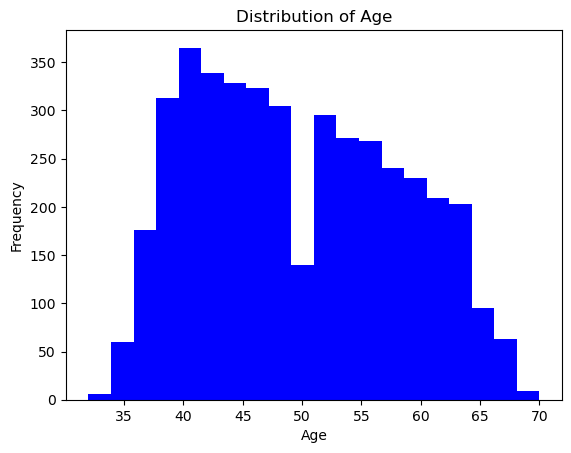

In [24]:
plt.hist(df['age'], bins=20, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


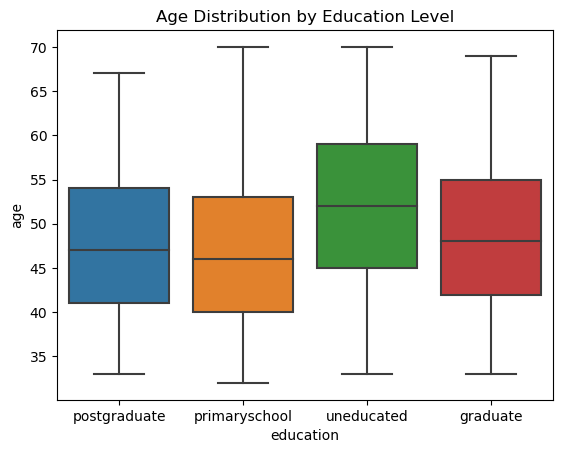

In [25]:
sns.boxplot(x='education', y='age', data= df)
plt.title('Age Distribution by Education Level')
plt.show()


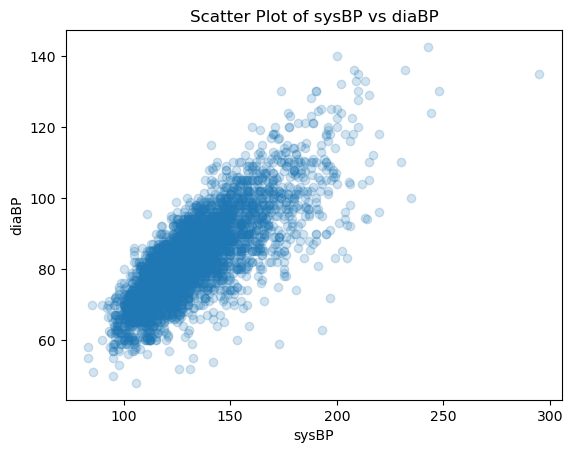

In [26]:
plt.scatter(df['sysBP'], df['diaBP'], alpha = 0.2)
plt.title('Scatter Plot of sysBP vs diaBP')
plt.xlabel('sysBP')
plt.ylabel('diaBP')
plt.show()


C:\Users\marvellous\AppData\Local\Temp\ipykernel_5004\2542953904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


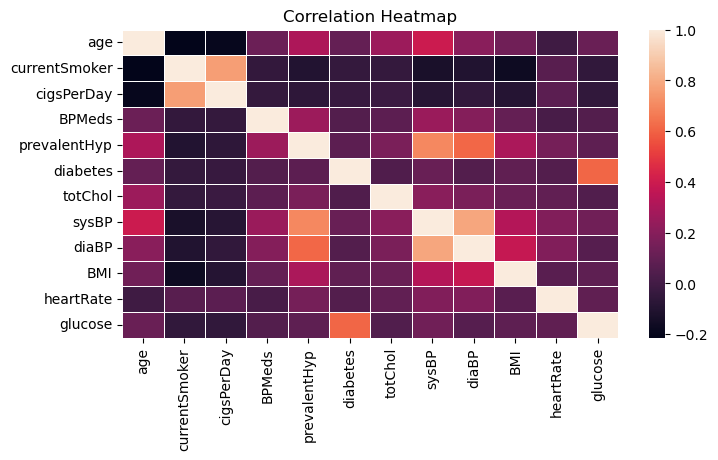

In [27]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, linewidths=0.7)
plt.title('Correlation Heatmap')
plt.show()

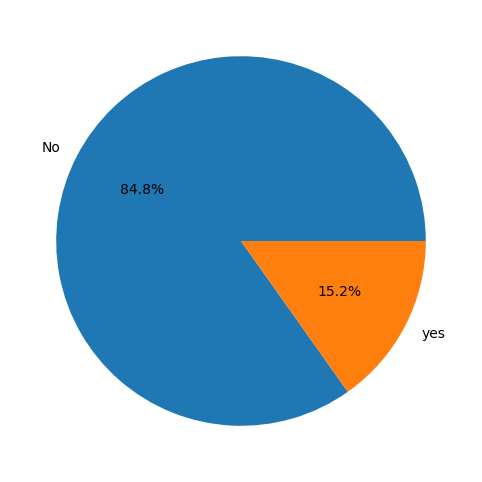

In [28]:
plt.figure(figsize=(10, 6))
plt.pie(df['Heart_stroke'].value_counts(),autopct='%1.1f%%',labels=df['Heart_stroke'].value_counts().index,)
plt.show()

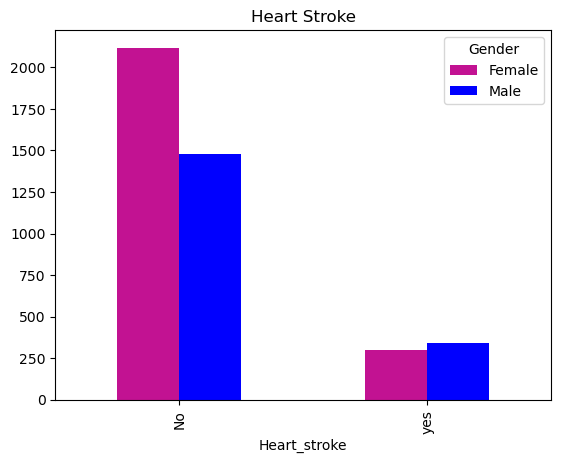

In [29]:
grouped_df = df.groupby(['Heart_stroke', 'Gender',]).size().unstack(fill_value=0)
grouped_df.plot(kind='bar', color=['#C21292', 'blue'] )
plt.title('Heart Stroke')
plt.show()

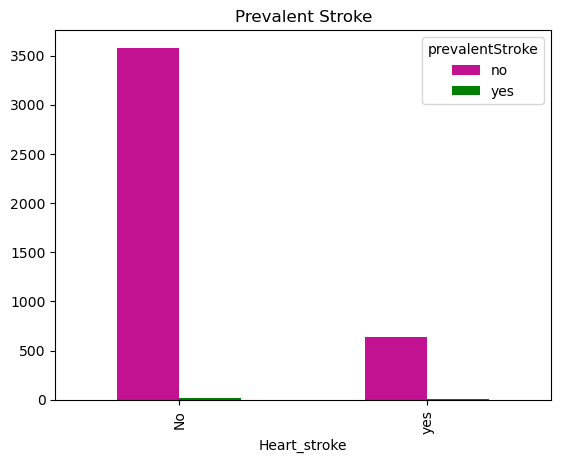

In [30]:
groupeddf = df.groupby(['Heart_stroke', 'prevalentStroke',]).size().unstack(fill_value=0)
groupeddf.plot(kind='bar', color=['#C21292', 'Green'] )
plt.title('Prevalent Stroke')
plt.show()

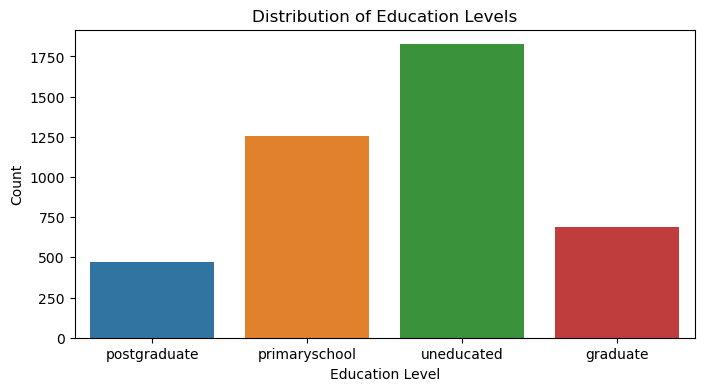

In [31]:
plt.figure(figsize=(8, 4))
sns.countplot(x='education', data=df)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

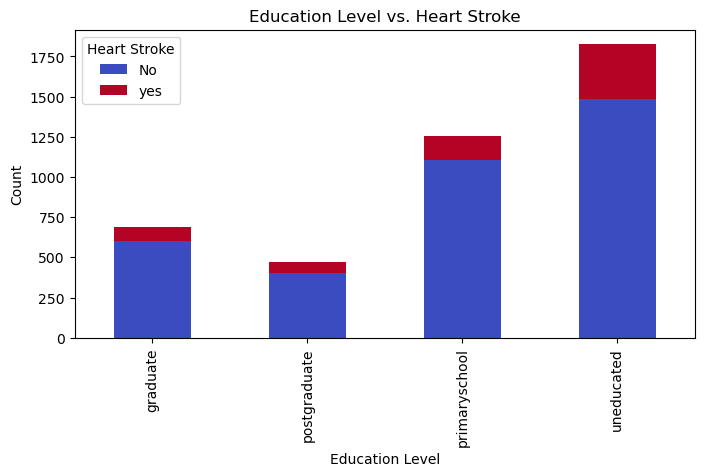

In [32]:
education_counts = df.groupby(['education', 'Heart_stroke']).size().unstack()
education_counts.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='coolwarm')
plt.title('Education Level vs. Heart Stroke')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Heart Stroke')
plt.show()


Group by function

In [33]:
education_counts = df.groupby(['education', 'Heart_stroke']).size().unstack(fill_value = 0)

print(education_counts)

Heart_stroke     No  yes
education               
graduate        599   88
postgraduate    403   70
primaryschool  1106  147
uneducated     1486  339


In [34]:
clean_df = df
clean_df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
5,Female,43,primaryschool,0,0.0,0.0,no,1,0,228.0,180.0,110.0,30.30,77.0,99.0,No
6,Female,63,uneducated,0,0.0,0.0,no,0,0,205.0,138.0,71.0,33.11,60.0,85.0,yes
7,Female,45,primaryschool,1,20.0,0.0,no,0,0,313.0,100.0,71.0,21.68,79.0,78.0,No
8,Male,52,uneducated,0,0.0,0.0,no,1,0,260.0,141.5,89.0,26.36,76.0,79.0,No
9,Male,43,uneducated,1,30.0,0.0,no,1,0,225.0,162.0,107.0,23.61,93.0,88.0,No


In [36]:
csv_file_path = 'C:\Dataworks\Iungo solutions\clean_heart_disease.csv'

clean_df.to_csv(csv_file_path, index=False)